# Number of works, languages and fandoms

In [1]:
import pandas as pd
from os.path import join
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from langcodes import *
import language_data
import re

In [2]:
def counter_to_axes(counter_obj):
    x_axis = list(counter_obj.keys())
    y_axis = list(counter_obj.values())
    return (x_axis,y_axis)

The analyses in this notebook are based on the [data dump for fan statisticians](https://archiveofourown.org/admin_posts/18804) shared via the Archive of our own website.

In [3]:
directory = '20210226-stats'
csv1 = 'works-20210226.csv'

path = join(directory,csv1)

works = pd.read_csv(path)

In [4]:
print(f"The dataset contains works created in between {works['creation date'].min()} and {works['creation date'].max()} ")

The dataset contains works created in between 2008-09-13 and 2021-02-26 


## Number of works

In [5]:
def year_month(date):
    month = f"{date.month:02d}"
    return f'{date.year}-{month}'

In [6]:
works['creation date'] = pd.to_datetime(works['creation date'])
works['year_month'] = works['creation date'].apply(year_month)

In [7]:
creation_dates = Counter(sorted(works['year_month']))

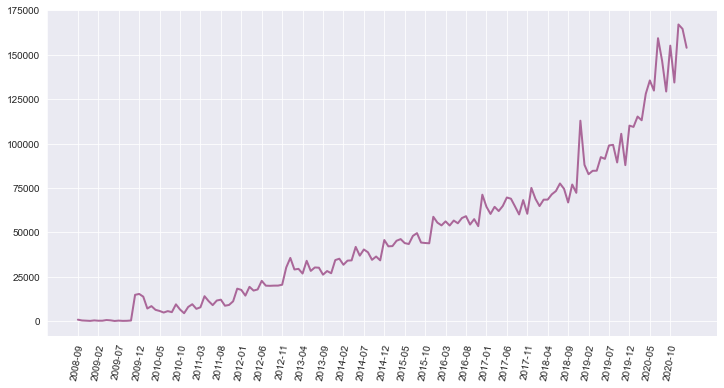

In [8]:
x_axis, y_axis = counter_to_axes(creation_dates )

sns.set_style("darkgrid")

fig = plt.figure( figsize = ( 12, 6))
ax = sns.lineplot(x=x_axis, y=y_axis, 
                  color= '#AA6799', linestyle='solid',
                  linewidth=2 )

ax.set_xticks(ax.get_xticks()[::5]); 

plt.xticks(rotation= 80)
plt.show()

## Languages

In [9]:
def find_language_name(lang):
    name = ''
    if not(pd.isna(lang)):
        name = Language.make(language=lang).display_name()
    else:
        name = 'Unknown language'
    return name

In [10]:
languages = Counter(works['language'])
df = pd.DataFrame.from_dict(languages,orient='index').reset_index()
df.columns = ['language','count']
df['language_name'] = df['language'].apply(find_language_name)

In [11]:
english_works = str(df.query('language=="en"')['count'].iloc[0])
print(f'The archive contains {english_works} works in English')

The archive contains 6587693 works in English


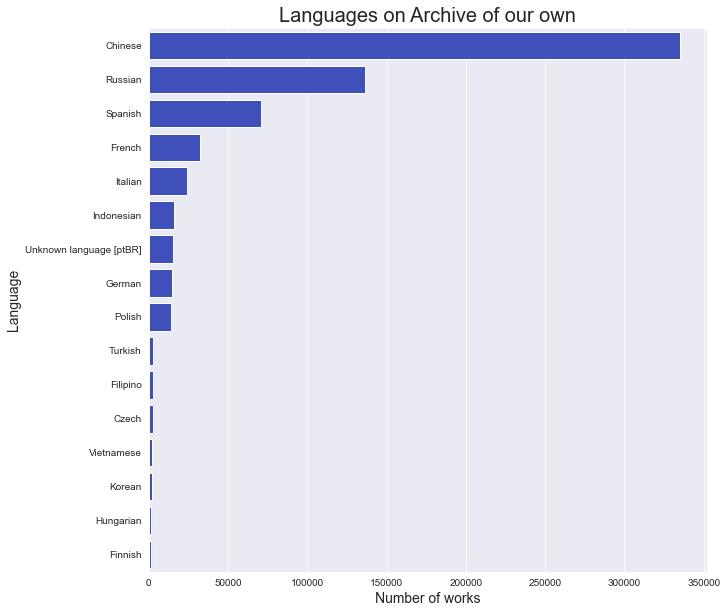

In [12]:
df = df.query( 'language!="en"')
df = df.query( 'count>1000')
df = df.sort_values(by=['count'],ascending=False) 
fig = plt.figure( figsize=( 10 , 10 ) )

graph = sns.barplot(data=df,x='count',y='language_name',color="#2b41cf")

graph.set_title('Languages on Archive of our own' , size = 20) 
graph.set_xlabel('Number of works' , size = 14) 
graph.set_ylabel('Language' , size = 14 )


plt.show()

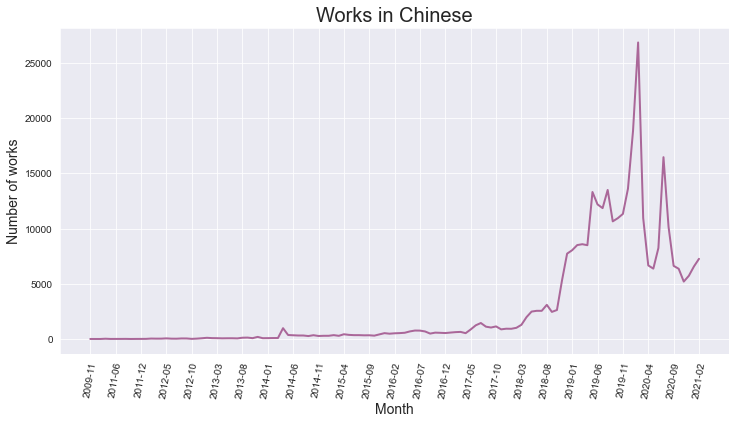

In [13]:
chinese_works = works.query('language == "zh"')
creation_dates = Counter(sorted(chinese_works['year_month']))

x_axis, y_axis = counter_to_axes(creation_dates )

sns.set_style("darkgrid")

fig = plt.figure( figsize = ( 12, 6))
ax = sns.lineplot(x=x_axis, y=y_axis, 
                  color= '#AA6799', linestyle='solid',
                  linewidth=2 )

ax.set_xticks(ax.get_xticks()[::5]); 
ax.set_title('Works in Chinese' , size = 20) 
ax.set_xlabel('Month' , size = 14) 
ax.set_ylabel('Number of works' , size = 14 )

plt.xticks(rotation= 80)
plt.show()

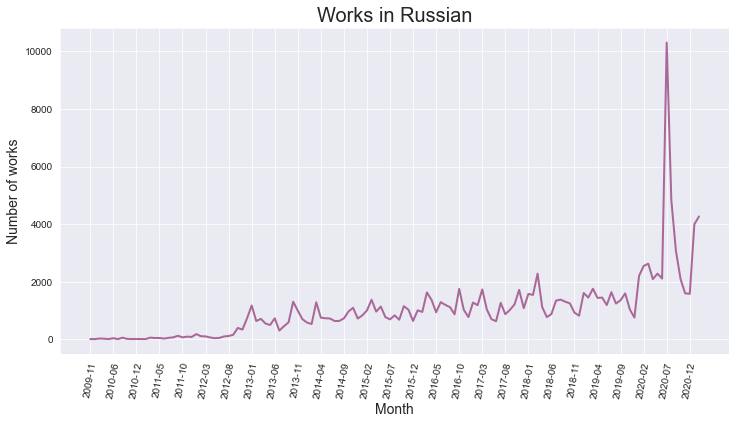

In [14]:
chinese_works = works.query('language == "ru"')
creation_dates = Counter(sorted(chinese_works['year_month']))

x_axis, y_axis = counter_to_axes(creation_dates )

sns.set_style("darkgrid")

fig = plt.figure( figsize = ( 12, 6))
ax = sns.lineplot(x=x_axis, y=y_axis, 
                  color= '#AA6799', linestyle='solid',
                  linewidth=2 )

ax.set_xticks(ax.get_xticks()[::5]); 
ax.set_title('Works in Russian' , size = 20) 
ax.set_xlabel('Month' , size = 14) 
ax.set_ylabel('Number of works' , size = 14 )

plt.xticks(rotation= 80)
plt.show()

## Word count

In [15]:
avg = works['word_count'].mean()
print(f"Average word count is {round(avg,2)} words.")
print(f"The longest work has {int(works['word_count'].max())} words.")

Average word count is 7213.85 words.
The longest work has 5078036 words.


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


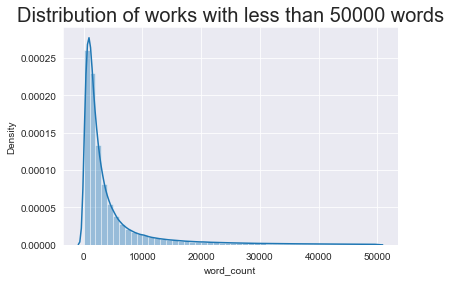

In [16]:
ax = sns.distplot(works.query('word_count<50000')['word_count'])
ax.set_title('Distribution of works with less than 50000 words' , size = 20) 
plt.show()

## Tags

In [17]:
directory = '20210226-stats'
csv2 = 'tags-20210226.csv'

path = join(directory,csv2)
tags = pd.read_csv(path)

In [18]:
import warnings
warnings.filterwarnings("ignore")

def remove_non_ascii(text):
    new_text = text
    if re.search(r'[|]',text):
        index_pipe = text.index('|')
        new_text = text[index_pipe+1:]
    return new_text
        
max_works = 50000
fandoms = tags.query('type=="Fandom"')
fandoms['name'] = fandoms['name'].apply(remove_non_ascii)
fandoms = fandoms.query('cached_count>{}'.format(max_works))
fandoms = fandoms.sort_values(by="cached_count",ascending=False)

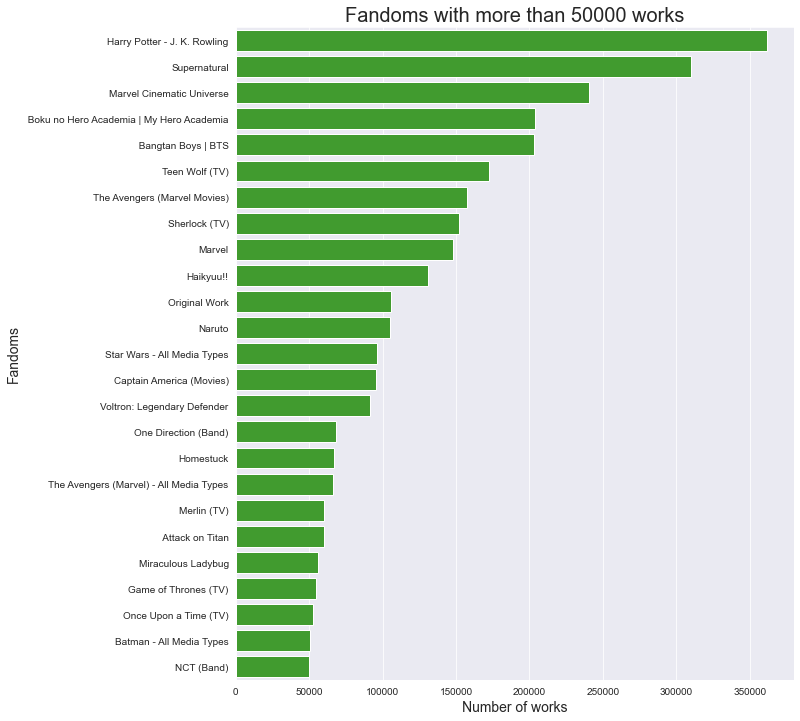

In [19]:
fig = plt.figure( figsize=( 10 , 12 ) )


graph = sns.barplot(data=fandoms,y='name',x='cached_count',color="#35ad1d")

graph.set_title(f'Fandoms with more than {max_works} works' , size = 20) 
graph.set_xlabel('Number of works' , size = 14) 
graph.set_ylabel('Fandoms' , size = 14 )

plt.show()